In [35]:
#imports
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix
import pandas as pd
from sklearn import linear_model
import ipywidgets as widgets
from IPython.display import display
import sys
sys.float_info.max
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import files
from IPython.display import Image
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive




In [36]:
#reading the training dataset
bmi_data  =pd.read_csv("https://raw.githubusercontent.com/abhiwalia15/500-Person-Gender-Height-Weight-Body-Mass-Index/master/500_Person_Gender_Height_Weight_Index.csv", error_bad_lines= False)



In [37]:
bmi_data.shape

(500, 4)

In [38]:
bmi_data.info

<bound method DataFrame.info of      Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]>

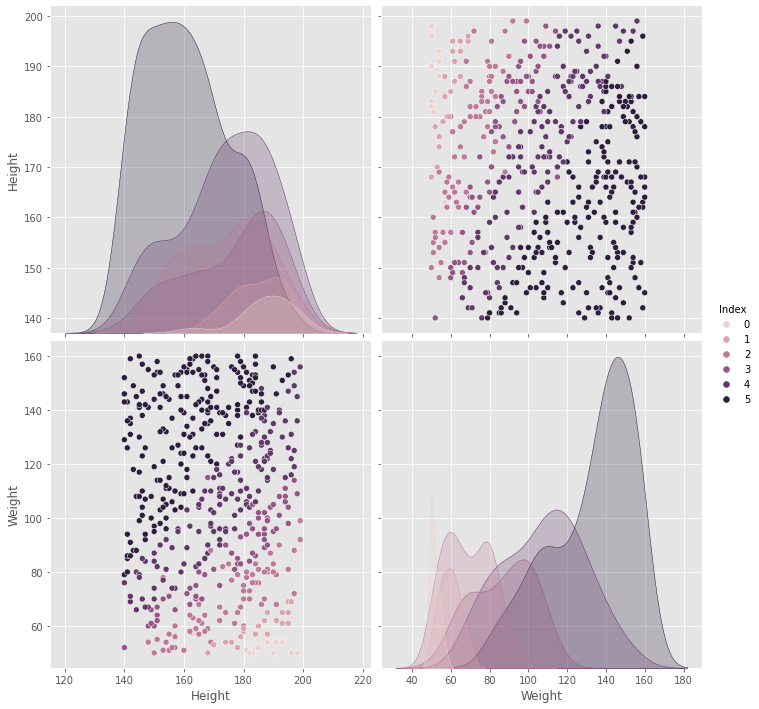

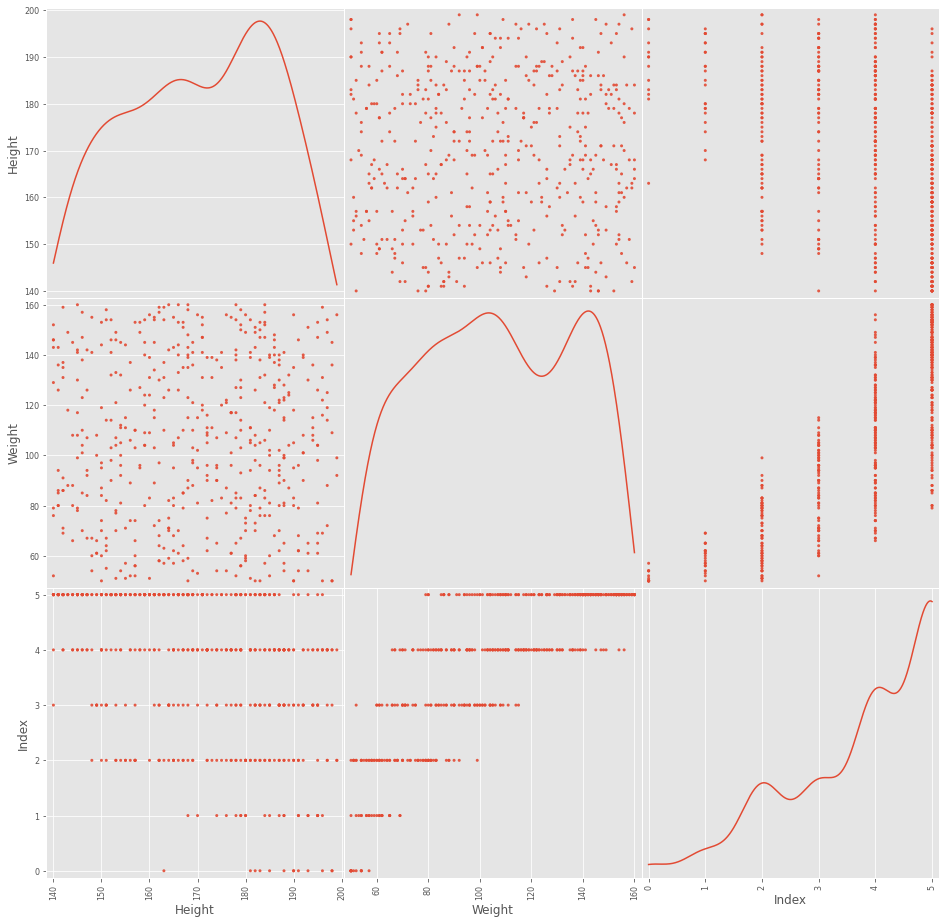

In [39]:
plt.style.use('ggplot')
sns.pairplot(bmi_data, hue='Index', height=5)  # Seaborn visualization
pd.plotting.scatter_matrix(bmi_data, alpha=0.9, figsize=(16, 16), diagonal='kde')  # Pandas scatter-matrix
plt.show()

In [40]:

bmi_data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


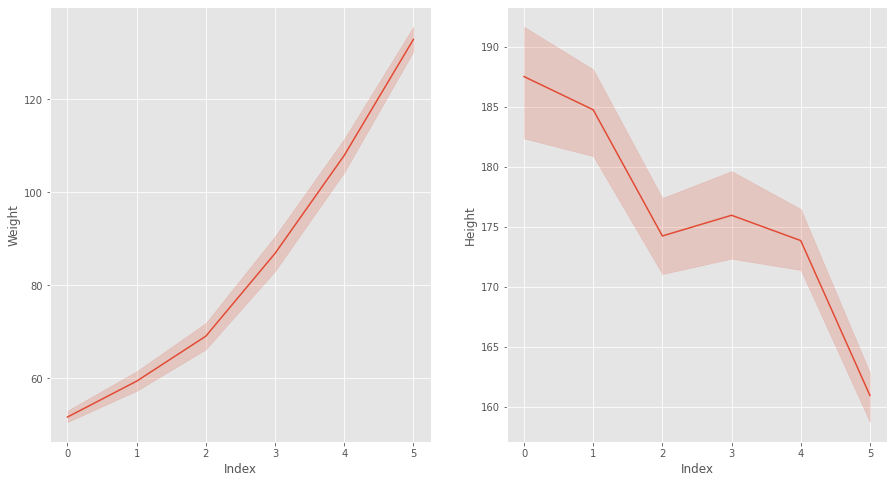

In [41]:
fig, ax= plt.subplots(1,2, figsize=(15,8))
sns.lineplot(bmi_data['Index'],bmi_data['Weight'], ax=ax[0])
sns.lineplot(bmi_data['Index'],bmi_data['Height'], ax=ax[1])
plt.show()

In [42]:
bmi_data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [43]:
bmi_data.dropna()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [44]:
bmi_data.Gender = bmi_data.Gender.replace({'Male': 1})
bmi_data.Gender = bmi_data.Gender.replace({'Female': 2})
bmi_data.Gender

0      1
1      1
2      2
3      2
4      1
      ..
495    2
496    2
497    2
498    1
499    1
Name: Gender, Length: 500, dtype: int64

In [45]:
X = bmi_data.drop('Index', axis=1)
print(X)

     Gender  Height  Weight
0         1     174      96
1         1     189      87
2         2     185     110
3         2     195     104
4         1     149      61
..      ...     ...     ...
495       2     150     153
496       2     184     121
497       2     141     136
498       1     150      95
499       1     173     131

[500 rows x 3 columns]


In [46]:

y = bmi_data.Index
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state= 32)
X_train.dtypes


Gender    int64
Height    int64
Weight    int64
dtype: object

In [47]:
model_bmi = linear_model.LinearRegression()
model_bmi.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Button(description='Find my BMI', layout=Layout(height='20px', width='30%'), style=ButtonStyle())

Output()

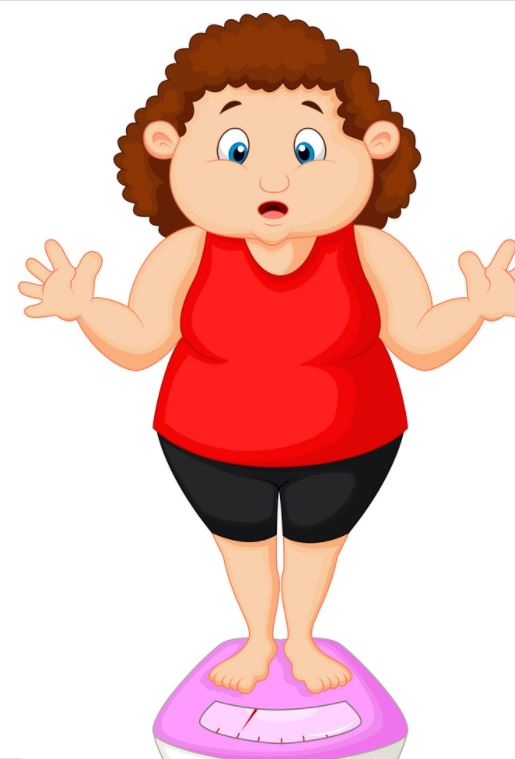

In [87]:



#@title Input (Data) Form for Testing our BMI ML Model { run: "auto", vertical-output: true }
#@markdown ---

#@markdown Gender: 1-Male  2-Female

Gender = "1" #@param ["1", "2"]


#@markdown Height 
Height = 145.5 #@param {type:"slider", min:0, max:200, step:0.5}

#@markdown Weight 
Weight = "89" #@param ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51","52","53","54","55","56","57","58","59","60","61","62","63","64","65","66","67","68","69","70","71","72","73","74","75","76","77","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97","98","99","100","101","102","103","104","105","106","107","108","109","110"] {allow-input: true}
from IPython.display import Image

temp_df_row = pd.DataFrame([[Gender, Height, Weight]])
temp_pred = model_bmi.predict(temp_df_row)



result = 'Thin'
if (int)(temp_pred[0]) == 0:
  result = 'Extremely Weak'
elif (int)(temp_pred[0]) == 1:
  result = 'Weak'
elif (int)(temp_pred[0]) == 2 :
  result = 'Normal'
elif (int)(temp_pred[0]) == 3:
  result = 'Over Weight'
elif (int)(temp_pred[0]) == 4:
  result = 'Obeise'
elif (int)(temp_pred[0]) >= 5:
  result = 'Extremely Obeise'
else:
  result = 'UNKNOWN'


import ipywidgets as widgets
from IPython.display import display
from ipywidgets import Button, Layout

button = widgets.Button(description='Find my BMI',layout=Layout(width='30%', height='20px',colour='blue'))
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
      print()
      print()
      print()
      print()
      print('Your are BMI status is ',temp_pred[0] , 'you are ',result)
      print()
      print()


button.on_click(on_button_clicked)  
if (int)(temp_pred[0]) <= 0:
   display(button, output,  Image('https://github.com/Margaret2702/Deeplearning/raw/main/weak.JPG'))
elif (int)(temp_pred[0]) == 1:
   display(button, output,  Image('https://github.com/Margaret2702/Deeplearning/raw/main/thin.JPG'))
elif (int)(temp_pred[0]) == 2:
   display(button, output,  Image('https://github.com/Margaret2702/Deeplearning/raw/main/normal.JPG'))
elif (int)(temp_pred[0]) == 3:
   display(button, output,  Image('https://github.com/Margaret2702/Deeplearning/raw/main/overweight.jpg'))
elif (int)(temp_pred[0]) == 4:
   display(button, output,  Image('https://github.com/Margaret2702/Deeplearning/raw/main/fat.JPG'))
elif (int)(temp_pred[0]) >= 5:
   display(button, output,  Image('https://github.com/Margaret2702/Deeplearning/raw/main/obeise.jpg'))
else:
  result = 'UNKNOWN'
